In [2]:
import pandas as pd

In [3]:
# load dataset
df = pd.read_csv("../data/digit.dat", delimiter=';', dtype=str)

In [4]:
# drop duplicate columns
df.drop(columns=["A2", "B2", "C2", "D2", "E2", "F2", "G2", "H2"], inplace=True)

In [ ]:
df.replace({'ZERO': 0, 'ONE': 1}, regex=True, inplace=True)
df.replace(
    {
    'one': 1,
    'two': 2,
    'three': 3,
    'four': 4,
    'five': 5,
    'six': 6,
    'seven': 7,
    'eight': 8,
    'nine': 9,
    'zero': 0
    }, 
    regex=True, 
    inplace=True
)

In [6]:
# view data
df.head()

,A,B,C,D,E,F,G,H
0,7,1,0,1,0,0,1,0
1,1,0,0,1,0,0,1,0
2,4,0,1,1,1,0,1,0
3,2,1,1,1,1,1,0,0
4,8,0,1,1,1,1,1,1


In [7]:
# save features as df
features = df.loc[:, "B":"H"]

In [8]:
# save target as df
target = df[["A"]]

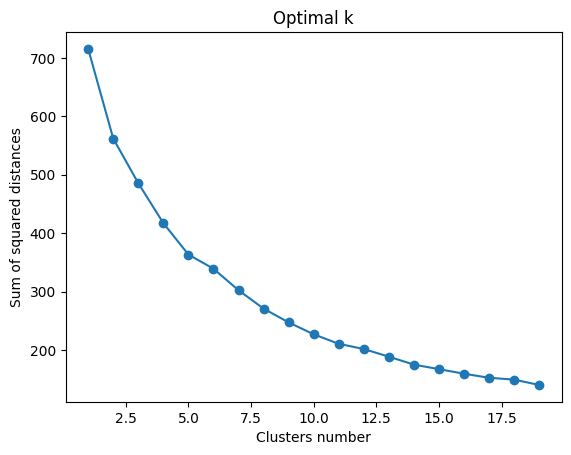

In [10]:
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

k_clusters = range(1, 20)

models = [KMeans(n_clusters=k, random_state=42).fit(features) for k in k_clusters]
dist = [model.inertia_ for model in models]

plt.plot(k_clusters, dist, marker='o')
plt.xlabel('Clusters number')
plt.ylabel('Sum of squared distances')
plt.title('Optimal k')
plt.show()

In [14]:
k1 = 5
model_k1 = KMeans(
    n_clusters=k1, 
    random_state=42,
)
model_k1.fit(features)
df['cluster'] = model_k1.labels_
df.groupby('cluster').mean()

,A,B,C,D,E,F,G,H
cluster,,,,,,,,
0,4.054945,0.582418,0.065934,0.901099,0.120879,0.131868,0.923077,0.109890
1,4.500000,0.936170,0.968085,0.925532,0.500000,0.968085,0.893617,0.882979
2,6.228188,0.919463,0.919463,0.281879,0.986577,0.342282,0.932886,0.939597
3,3.505051,0.868687,0.050505,0.919192,0.969697,0.494949,0.474747,0.929293
4,4.477612,0.164179,0.895522,0.910448,0.925373,0.104478,0.925373,0.134328


In [18]:
for i in range(0, k1):
    print(f"Cluster {i}:")
    print(df[df['cluster'] == i]['A'].value_counts())
    print()

Cluster 0:
A
7    44
1    37
3     8
0     2
Name: count, dtype: int64

Cluster 1:
A
8    41
0    36
6     7
2     3
9     3
5     2
3     1
7     1
Name: count, dtype: int64

Cluster 2:
A
5    51
6    43
9    34
8    10
3     9
0     1
2     1
Name: count, dtype: int64

Cluster 3:
A
2    39
3    37
9    11
8     4
4     3
7     2
0     2
1     1
Name: count, dtype: int64

Cluster 4:
A
4    49
9     7
1     5
8     3
5     1
0     1
7     1
Name: count, dtype: int64



In [19]:
k2 = 10
model_k2 = KMeans(
    n_clusters=k2, 
    random_state=42,
)
model_k2.fit(features)
df['cluster'] = model_k2.labels_
df.groupby('cluster').mean()

,A,B,C,D,E,F,G,H
cluster,,,,,,,,
0,3.955056,0.528090,0.056180,0.932584,0.157303,0.146067,0.921348,0.067416
1,5.509434,1.000000,0.830189,0.000000,0.924528,0.000000,0.962264,0.886792
2,2.358974,0.820513,0.000000,0.846154,0.923077,1.000000,0.000000,0.897436
3,1.744681,0.936170,0.936170,0.851064,0.000000,0.936170,0.893617,0.851064
4,3.937500,0.875000,0.000000,0.958333,0.937500,0.000000,0.833333,0.979167
5,5.000000,0.000000,0.888889,0.500000,0.944444,0.000000,1.000000,0.833333
6,5.981481,0.833333,0.907407,0.000000,1.000000,1.000000,0.851852,0.851852
7,4.416667,0.229167,0.979167,1.000000,0.916667,0.062500,0.895833,0.000000
8,7.617021,1.000000,1.000000,1.000000,1.000000,0.000000,0.893617,1.000000


In [21]:
for i in range(0, k2):
    print(f"Cluster {i}:")
    print(df[df['cluster'] == i]['A'].value_counts())
    print()

Cluster 0:
A
7    40
1    38
3     6
0     2
4     2
8     1
Name: count, dtype: int64

Cluster 1:
A
5    38
9     6
3     3
6     3
7     3
Name: count, dtype: int64

Cluster 2:
A
2    34
4     2
7     1
9     1
0     1
Name: count, dtype: int64

Cluster 3:
A
0    34
6     6
9     2
8     2
3     1
7     1
2     1
Name: count, dtype: int64

Cluster 4:
A
3    32
9     7
2     5
8     1
1     1
4     1
7     1
Name: count, dtype: int64

Cluster 5:
A
4    8
5    4
9    3
8    1
0    1
3    1
Name: count, dtype: int64

Cluster 6:
A
6    40
8     5
5     4
4     3
2     1
9     1
Name: count, dtype: int64

Cluster 7:
A
4    36
1     4
9     4
8     2
5     1
7     1
Name: count, dtype: int64

Cluster 8:
A
9    30
8     6
3     5
5     5
0     1
Name: count, dtype: int64

Cluster 9:
A
8    40
3     7
0     3
2     2
5     2
6     1
9     1
7     1
Name: count, dtype: int64



In [22]:
k3 = 12
model_k3 = KMeans(
    n_clusters=k3, 
    random_state=42,
)
model_k3.fit(features)
df['cluster'] = model_k3.labels_
df.groupby('cluster').mean()

,A,B,C,D,E,F,G,H
cluster,,,,,,,,
0,4.183099,0.591549,0.000000,0.929577,0.140845,0.00000,0.901408,0.126761
1,5.480769,1.000000,0.826923,0.000000,0.942308,0.00000,0.961538,0.903846
2,2.358974,0.820513,0.000000,0.846154,0.923077,1.00000,0.000000,0.897436
3,1.744681,0.936170,0.936170,0.851064,0.000000,0.93617,0.893617,0.851064
4,3.911111,0.866667,0.000000,0.955556,1.000000,0.00000,0.822222,0.977778
5,5.000000,0.000000,0.888889,0.500000,0.944444,0.00000,1.000000,0.833333
6,5.981481,0.833333,0.907407,0.000000,1.000000,1.00000,0.851852,0.851852
7,6.352941,1.000000,1.000000,0.941176,0.647059,0.00000,1.000000,0.000000
8,7.617021,1.000000,1.000000,1.000000,1.000000,0.00000,0.893617,1.000000


In [24]:
for i in range(0, k3):
    print(f"Cluster {i}:")
    print(df[df['cluster'] == i]['A'].value_counts())
    print()

Cluster 0:
A
7    35
1    28
3     8
Name: count, dtype: int64

Cluster 1:
A
5    38
9     6
3     3
6     3
7     2
Name: count, dtype: int64

Cluster 2:
A
2    34
4     2
7     1
9     1
0     1
Name: count, dtype: int64

Cluster 3:
A
0    34
6     6
9     2
8     2
3     1
7     1
2     1
Name: count, dtype: int64

Cluster 4:
A
3    30
9     7
2     5
8     1
1     1
4     1
Name: count, dtype: int64

Cluster 5:
A
4    8
5    4
9    3
8    1
0    1
3    1
Name: count, dtype: int64

Cluster 6:
A
6    40
8     5
5     4
4     3
2     1
9     1
Name: count, dtype: int64

Cluster 7:
A
7    5
4    4
9    4
8    2
5    1
0    1
Name: count, dtype: int64

Cluster 8:
A
9    30
8     6
3     5
5     5
0     1
Name: count, dtype: int64

Cluster 9:
A
8    40
3     6
0     3
2     2
5     2
6     1
9     1
Name: count, dtype: int64

Cluster 10:
A
4    34
1     5
7     1
Name: count, dtype: int64

Cluster 11:
A
1    9
7    3
0    1
8    1
3    1
Name: count, dtype: int64

